In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons
from sklearn.svm import LinearSVC, SVC

In [45]:
X, y = make_blobs(centers = 2, n_samples = 100, n_features = 2)

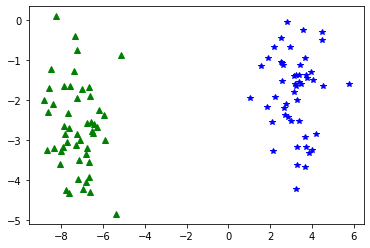

In [46]:
plt.plot(X[y == 0, 0], X[y == 0, 1], 'b*')
plt.plot(X[y == 1, 0], X[y == 1, 1], 'g^')

In [47]:
lin_svc = LinearSVC(C = 3, loss = 'hinge')
lin_svc.fit(X, y)

svm_clf = SVC(C = 3, kernel = 'linear')
svm_clf.fit(X, y)

SVC(C=3, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [86]:
def plot_decision_line(clf, ax):
    w = clf.coef_[0]
    b = clf.intercept_
    
    x0 = np.linspace(X[:, 0].min(), X[:, 0].max(), 200)
    x1 = -(w[0]*x0+b)/w[1]
    
    margin = 1/w[1]
    
    gutter_up = x1+margin
    gutter_down = x1-margin
    
    decision_function = clf.decision_function(X)
    
    sv_indices = np.where((2*y-1)*decision_function-1 < 0)
    sv = X[sv_indices]
    
    ax.plot(X[y == 0, 0], X[y == 0, 1], 'b*')
    ax.plot(X[y == 1, 0], X[y == 1, 1], 'g^')
    
    ax.plot(x0, x1, 'r-')
    ax.plot(x0, gutter_up, 'm--')
    ax.plot(x0, gutter_down, 'm--')
    
    ax.scatter(sv[:, 0], sv[:, 1], facecolor = 'yellow', s = 100)
    
    if clf.__class__.__name__ == 'SVC':
        ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s = 100, facecolor = 'yellow')
        
    ax.axis([-9, 6,-5, 0])

In [87]:
def plot_decision_line2(clf, ax):
    w = clf.coef_[0]
    b = clf.intercept_
    
    ax.plot(X[y == 0, 0], X[y == 0, 1], 'b*')
    ax.plot(X[y == 1, 0], X[y == 1, 1], 'g^')
    
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    x0, x1 = np.meshgrid(
        np.linspace(xlim[0], xlim[1], 100),
        np.linspace(ylim[0], ylim[1], 100)
    )
    
    X_new = np.c_[x0.ravel(), x1.ravel()]
    
    y_pred = clf.decision_function(X_new).reshape(x0.shape)
    
    ax.contour(x0, x1, y_pred, colors = ['magenta', 'red', 'magenta'], linestyles = ['--', '-', '--'], levels = [-1, 0, 1])
    
    if clf.__class__.__name__ == 'SVC':
        ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s = 100, facecolor = 'yellow')
    
    ax.axis([-9, 6,-5, 0])

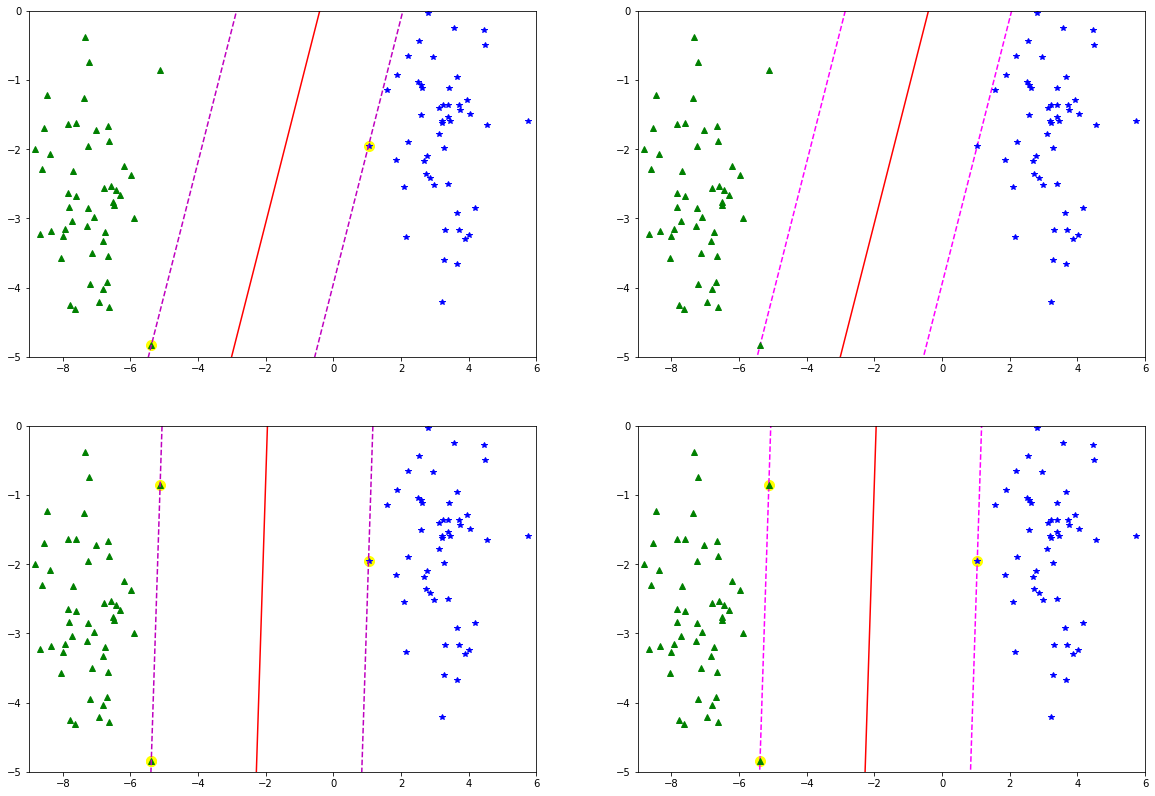

In [88]:
fig = plt.figure(figsize = (20, 14))

count = 1

for clf in [lin_svc, svm_clf]:
    axs = fig.add_subplot(2, 2, count)
    plot_decision_line(clf, axs)
    count += 1
    axs = fig.add_subplot(2, 2, count)
    plot_decision_line2(clf, axs)
    count += 1

In [89]:
svm_clf.decision_function(X[3:4])

array([1.41221275])

In [56]:
lin_svc.decision_function(X[3:4])

array([1.62511899])

In [63]:
w = lin_svc.coef_[0]
b = lin_svc.intercept_
y[3:4]

array([1])

In [64]:
w[0]*X[3:4, 0]+w[1]*X[3:4, 1]+b

array([1.62511899])